## Final Project Submission

Please fill out:
* Student name: `Ilyas Suleman Bourzat`
* Student pace: part time
* Scheduled project review date/time: Monday June 3 at 2.59pm
* Instructor name: Samuel Karu, Samuel G Mwangi, Winnie Anyoso
* Blog post URL:


![Microsoft Logo](microsoft2.png)

# From Data to Movies: Guiding Microsoft's Entry into the Movie Industry
___

## Overview

___

This project aims to provide strategic insights to Microsoft's new movie studio through an in-depth Exploratory Data Analysis (EDA). We will be examining variuos datasets from [IMDB](https://www.imdb.com/) and [Box Office Mojo](https://www.boxofficemojo.com/) - we'll be trying to identify Box Office trends and impactful movie performance metrics. This analysis will mainly be focused on what type of films are highly successful and in turn translating these findigs into actionable recommendations for Microsoft's film production strategy.

## Introduction

___

In today's highly competitive entertainment industry, where companies continously aim to create captivating content while simultaneously giving high financial returns. Microsoft has been inspired by the success of other major companies - such as Amazon - to create original films and plans to establish their own new movie studio. However, entering the film production industry poses a significant challenge since it requires a comprehensive understanding of movies that not only ressonate with majority of audience around the world but also do well financially. 

This project aims to address this challenge by leveraging EDA to analyse various movie datasets. This willl help us to identify current Box Office trends, movie performance metrics and audience preferences. The insights derived from this data will provide Microsoft's new movie studio with actionable recommendations on what types of films to create. 


The main stakeholders of this project include the head of the Microsoft's new movie studio, the executive, the marketing team, the film production team, investors, financial analysts, data science and anaytics team. These stakeholder's will used the projets findings to make data driven decisions on movie production, marketing strategies, and financial investments ensuring ensuring the new studio succeeds in the competitive space.

## Business Goal

___

The business goal of this project is to provide actionable insights to Microsoft's new movie studio to guide their production strategy. Specifically, the project aims to identify the types of films that are currently performing well at the box office, allowing the studio to make data-driven decisions on which genres, themes, and characteristics of films to focus on. This will help ensure the studio's success in the competitive film industry by maximizing their chances of producing commercially successful movies.

## Data Understanding

___

The movie datasets used in this project has been obtained from:
1. [IMDB](https://www.imdb.com/)
    * `IMDB` is a reputable extensive database for movies, TV shows and celebrities. It has been offering detailed information for over 3 decades and remains an authority in the movie space. The `im.db` file is an SQL database containing information about movies, cast and more that are essential to determine various factors which contribute to a movie's success in this project.
    
2. [Box Office Mojo](https://www.boxofficemojo.com/)
    * `Box Office Mojo` is a website that tracks revenue generated by Box Office movies and provides detailed statistics about them. It is majorly used to analyze and track the financial success of film. Our `bom.movie_gross.csv` file will provide critical information that will help access the financial performance of films. This will help the new studio head, company executives and investors to determine what type of films to invest in.

3. [TheMovieDB](https://www.themoviedb.org/)
    * `The Movie Database` is a database driven by users and provides comprehensive metadata on films including genres, crew, cast and production details. The `tmdb.movies.csv` file allows us to utilise the information from this database that will in turn allow us to uncover meaningful insights about genres and release dates which will lead to movie success for the studio.


4. [The Numbers](https://www.the-numbers.com/)
    * `The Numbers` is a resource for movie industry data, offering detailed information about box offfice performance, movie budgets and more. The `tn.movie_budgets.csv` file contains information about financial movie performance that will help us understand the economic aspects of movie production. 

### Importing relevant libraries

In [1]:
# Importing pandas, numpy, matplotlib with their alias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing chardet to find out type of encoding
import chardet

# Importing sqlite3 to connect to database
import sqlite3

# Adding magic command
%matplotlib inline

### Importing the datasets
We should first start by loading all the relevant datasets into the notebook so we can analyze them. We also need to connect to the `im.db` database. 

In [2]:
# Importing all datasets
# Importing csv files
box_office_movie_gross = pd.read_csv("Data/bom.movie_gross.csv")
numbers_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
tmdb_movies_dataset = pd.read_csv("Data/tmdb.movies.csv")

# Instanciate a connection to the im.db database
conn = sqlite3.connect("Data/im.db")

### Overview of the datasets

In this section, the aim is to comprehensively understand the data we are working with. They are several key steps to this process: 
1. **Statistical Analysis** - Here we will summarize the main characteristics of the data such as the mean, median and standard deviation.
2. **Dataset size** - Here we will be able to determine the size of our datasets and looking at how many records there are.
3. **Feature Inclusion** - We will go through the available feature sin the dataset in order to determine which ones will be relevant for our goal.
4. **Identifying Limitations** - Identifying any limitations that may have implications on the project in the future.

We will use various pandas methods such as `.describe()` and `.info()` to gain some insights on what type of data we are dealing with. We will also find the size of the datasets and features we would potentially want to include in our analysis and why.

#### Overview of the `box_office_movies_gross` DataFrame
##### 1. Statistical Analysis

In [3]:
# Viewing the firt 5 records of our DataFrame
box_office_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Using .describe() and .info() on our data to get a statistical overview
box_office_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
box_office_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The `foreign_gross` is of type `object` instead of `float` hence we are unable to retrieve information from this feature.This will be sorted out later when we are carrying out our data preparation.

##### 2. Dataset size
This DataFrame contains `3387` records. This is a fair amount of data we can use for our analysis.

##### 3. Feature Inclusion
   * Features included: `title`, `domestic_gross`, `foreign_gross`, `year`
   * Reasons: 
       * **The Gross Earnings**: This helps us measure financial success of the movies.
       * **Title**: This will help us in identifying which movies had financial success and ones that didn't.
       * **Year**: Knowing when the movies were released helps identify patterns between earnings and release year.

##### 4. Identifying Limitations
In this dataset, the only noticeable limitations are the missing values some of the features (`domestic_gross`,  `foreign_gross`), the `foreign_gross` feature being of type `object` instead of `float`. Incomplete earnings data can result in inaccurate financial success assessments.

#### Overview of the `numbers_movie_budget` DataFrame
##### 1. Statistical Analysis

In [6]:
# Viewing the first 5 records in the dataset
numbers_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Using .describe() and .info() to get a description and info about the dataset
numbers_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [8]:
numbers_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In the `numbers_movie_budgets`, we see that the columns "domestic_gross" and "worldwide_gross" are objects instead of floats or integers hence the `.describe()` method was not able to give us some statistical analysis based on these features.

##### 2. Dataset Size
The dataset has `5782 records`.

##### 3. Feature Inclusion 
   * Features included: `movie`, `production_budget`, `worldwide_gross`, `domestic_gross`
   * Reasons: 
       * **Gross Earnings**: This helps us measure financial success and profitability of the movies.
       * **Production Budget**: Understanding the financial investment required.
       * **Release Date**: Understanding the perfect time to release movies.

##### 4. Identifying Limitations
There major limitaion that might hinder analysis is the datatype of the currency colummns. They could potentially have missing records when converted to floats.

#### Overview of the `tmdb_movies_dataset` DataFrame
##### 1. Statistical Analysis

In [9]:
# Viewing the first 5 records of the dataset
tmdb_movies_dataset.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
# Using .describe() and .info() to get a description and info about the dataset
tmdb_movies_dataset.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [11]:
tmdb_movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Here we can see that in `tmdb_movies_dataset` DataFrame, the mean vote_average is 5.99 and the mean vote_count is 194.22. 

##### 2. Dataset size
The dataset has `26517 records` which will be enough data to carry out our analysis.

##### 3. Feature Inclusion
   * Features included: `title`, `release_date`, `genres`, `popularity`
   * Reasons: 
       * **Popularity**: Gauging audience interest.
       * **Genres**: Identifying popular genres.
       * **Release Date**: Analyzing trends over time.

##### 4. Identifying Implication 
Popularity scores might not accurately reflect long-term interest.

## Data Preparation

___

To reproduce the results in this section, make sure you have completed the following instructions before you get started:
1. First clone the github repository so you can have the data files on your computer.
2. To access the data, there is a file inside the cloned folder called `zippedData`. 
3. Create a directory called `Data` inside the cloned folder.
4. Unzip the data files and move them to the directory you just created.
5. Restart the notebook and run it up to this point. You will have imported the necessary data files you need.

Now, you are ready to replicate the results in this section. Everything is well explained by adding `text`, `comments in code cells` and `proper justifications` for operations carried out on the data.

In this section, we will be converting features into their correct data types, clean the data by handling missing values, removing duplicates and correcting errors. We will also create new features if need be and merge relevant datasets.



#### Preparing `box_office_movie_gross`

We will start with the `box_office_movie_gross` DataFrame where the `foreign_gross` column is of type `object` and convert it to `float`.

In [12]:
# Converting box_office_movie_gross foreign_gross column from object to float
# First we remove any '.' or ',' in the foreign_gross column and reassign it to the DataFrame 

# Removing ','
box_office_movie_gross["foreign_gross"] = box_office_movie_gross["foreign_gross"].str.replace(',', '')
# Removing '.'
box_office_movie_gross["foreign_gross"] = box_office_movie_gross["foreign_gross"].str.replace('.', '')

In [13]:
# Now, we convert the column to a float
box_office_movie_gross["foreign_gross"] = box_office_movie_gross["foreign_gross"].astype(float)

# Now we check if the column has been converted to a float
box_office_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


We have now succesfuly converted out `foreign_gross` column to a `float`.

We have now converted the column to its correct data type which will allow us to perform numerical operations on it. 

Next, we will drop all rows that don't have values in the `foreign_gross column` and all other rows that don't contain values. There are too many values to replace with the mean which will affect our data. 

In [14]:
# Dropping missing values in the dataframe
box_office_movie_gross.dropna(inplace=True)

# Checking for missing values
box_office_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [15]:
# Checking how many records we have left
len(box_office_movie_gross)

2007

To determine how much revenue the movies generated, we will create a new column called `total_gross` that will be the sum of both `foreign_gross` and `domestic_gross`.

To make our analysis easier, we should remove the 0's in both the `domestic_gross` and `foreign_gross` and put it in terms of millions. 

In [16]:
# Creating a new column called `domestic_gross (In millions)`
box_office_movie_gross["domestic_gross (millions)"] = box_office_movie_gross["domestic_gross"] / 1000000

# Dropping the old domestic_gross DataFrame
box_office_movie_gross.drop("domestic_gross", axis=1,inplace=True)

In [17]:
# Creating a new column called `foreign_gross (In millions)`
box_office_movie_gross["foreign_gross (millions)"] = box_office_movie_gross["foreign_gross"] / 1000000

# Dropping the old foreign_gross DataFrame
box_office_movie_gross.drop("foreign_gross", axis=1,inplace=True)

In [19]:
# Creating a new column total_gross
box_office_movie_gross["total_gross (millions)"] = box_office_movie_gross["domestic_gross (millions)"] + box_office_movie_gross["foreign_gross (millions)"]

# Viewing the DataFrame
box_office_movie_gross.head()

,title,studio,year,domestic_gross (millions),foreign_gross (millions),total_gross (millions)
0,Toy Story 3,BV,2010,415.0,652.0,1067.0
1,Alice in Wonderland (2010),BV,2010,334.2,691.3,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,296.0,664.3,960.3
3,Inception,WB,2010,292.6,535.7,828.3
4,Shrek Forever After,P/DW,2010,238.7,513.9,752.6


Next we will drop the `studio` column since it play no part in the analysis.

In [20]:
# Dropping the studio column 
box_office_movie_gross.drop("studio", axis=1, inplace=True)

# Viewing the DataFrame
box_office_movie_gross.head()

,title,year,domestic_gross (millions),foreign_gross (millions),total_gross (millions)
0,Toy Story 3,2010,415.0,652.0,1067.0
1,Alice in Wonderland (2010),2010,334.2,691.3,1025.5
2,Harry Potter and the Deathly Hallows Part 1,2010,296.0,664.3,960.3
3,Inception,2010,292.6,535.7,828.3
4,Shrek Forever After,2010,238.7,513.9,752.6


#### Preparing `numbers_movie_budgets`

Next we will look at the `numbers_movie_budgets` DataFrame. The main issue with the DataFrame was the columns `production_budget`, `worldwide_gross` and `domestic_gross` being of the wrong data type. Let's convert them from `object` to `float64`.

In [21]:
# Remove the dollar sign and commas, then convert to float for production_budget
numbers_movie_budgets['production_budget'] = numbers_movie_budgets['production_budget'].replace({r'\$': '', ',': ''}, 
                                                                                       regex=True).astype(float)

In [22]:
# Remove the dollar sign and commas, then convert to float for worldwide_gross
numbers_movie_budgets['worldwide_gross'] = numbers_movie_budgets['worldwide_gross'].replace({r'\$': '', ',': ''}, 
                                                                                       regex=True).astype(float)

In [23]:
# Remove the dollar sign and commas, then convert to float for domestic_gross
numbers_movie_budgets['domestic_gross'] = numbers_movie_budgets['domestic_gross'].replace({r'\$': '', ',': ''}, 
                                                                                       regex=True).astype(float)

In [24]:
# Check if the columns have been converted to float
numbers_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [25]:
# Viewing the first 5 records of the DataFrame
numbers_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


For easier viewing, let's convert the columns to millions.

In [26]:
# Convert into millions and creating a new column called 'production_budget (millions)'
numbers_movie_budgets['production_budget (millions)'] = numbers_movie_budgets['production_budget'] / 1000000

# Dropping the previous column
numbers_movie_budgets.drop('production_budget', axis=1, inplace=True)

In [27]:
# Convert into millions and creating a new column called 'worldwide_gross (millions)'
numbers_movie_budgets['worldwide_gross (millions)'] = numbers_movie_budgets['worldwide_gross'] / 1000000

# Dropping the previous column
numbers_movie_budgets.drop('worldwide_gross', axis=1, inplace=True)

In [28]:
# Convert into millions and creating a new column called 'domestic_gross (millions)'
numbers_movie_budgets['domestic_gross (millions)'] = numbers_movie_budgets['domestic_gross'] / 1000000

# Dropping the previous column
numbers_movie_budgets.drop('domestic_gross', axis=1, inplace=True)

In [29]:
# Viewing the first 5 records of the DataFrame
numbers_movie_budgets.head()

,id,release_date,movie,production_budget (millions),worldwide_gross (millions),domestic_gross (millions)
0,1,"Dec 18, 2009",Avatar,425.0,2776.345279,760.507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,241.063875
2,3,"Jun 7, 2019",Dark Phoenix,350.0,149.762350,42.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,1403.013963,459.005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,620.181382


We should determine the total gross these movies brought in by creating a column called `total_gross (millions)` that is the sum of `worldwide_gross (millions)` and `domestic_gross (millions)`.

In [30]:
# Creating the 'total_gross (millions)' column
numbers_movie_budgets['total_gross (millions)'] = numbers_movie_budgets['worldwide_gross (millions)'] + numbers_movie_budgets['domestic_gross (millions)']

# Let's view the DataFrame
numbers_movie_budgets.head()

,id,release_date,movie,production_budget (millions),worldwide_gross (millions),domestic_gross (millions),total_gross (millions)
0,1,"Dec 18, 2009",Avatar,425.0,2776.345279,760.507625,3536.852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,241.063875,1286.727750
2,3,"Jun 7, 2019",Dark Phoenix,350.0,149.762350,42.762350,192.524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,1403.013963,459.005868,1862.019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,620.181382,1936.903129


In [31]:
# Checking the length of the DataFrame
len(numbers_movie_budgets)

5782

Now the `numbers_movie_budgets` is ready for the data analysis section.

#### Preparing `tmdb_movies_dataset`

Next we will look at the `tmdb_movies_dataset` DataFrame. We will drop all unnecessary columns and only keep the features we need.

In [32]:
# Viewing the DataFrame first 5 records
tmdb_movies_dataset.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The features we had chosen to include were, `title`, `release_date` and `popularity`.

In [33]:
# Dropping columns we don't need
tmdb_movies_dataset.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'vote_average', 'vote_count'], 
                          axis=1,
                          inplace=True)

In [34]:
# Viewing the DataFrame first 5 records
tmdb_movies_dataset.head()

,original_title,popularity,release_date,title
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,Toy Story,28.005,1995-11-22,Toy Story
4,Inception,27.920,2010-07-16,Inception


We are now done with our data perparation.

## Data Analysis

___

In this section, we aim to analyze the data and produce useful findings that can inform recommendations that solve our business problems. It is important to define our key metrics that define and contribute to movie success. Some of them are:
1. **Financial Success** - This is the main metric that helps us to determine how well the movie did.
2. **Release Date** - Are there particular dates where when movies are released they do better?
3. **Genre** - What types are the top performing genres?
4. **Cast** - Are there top performing actors that makes movies succeed?
5. **Titles** - Is there a particular title length that leads to movies success?
6. **Production Budget** - Is there a correlation between the production budget and revenue?

In [35]:
# Let's start by viewing the datasets
tmdb_movies_dataset.head()

,original_title,popularity,release_date,title
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon
2,Iron Man 2,28.515,2010-05-07,Iron Man 2
3,Toy Story,28.005,1995-11-22,Toy Story
4,Inception,27.920,2010-07-16,Inception


In [36]:
numbers_movie_budgets.head()

,id,release_date,movie,production_budget (millions),worldwide_gross (millions),domestic_gross (millions),total_gross (millions)
0,1,"Dec 18, 2009",Avatar,425.0,2776.345279,760.507625,3536.852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,241.063875,1286.727750
2,3,"Jun 7, 2019",Dark Phoenix,350.0,149.762350,42.762350,192.524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,1403.013963,459.005868,1862.019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,620.181382,1936.903129


In [38]:
box_office_movie_gross.head()

,title,year,domestic_gross (millions),foreign_gross (millions),total_gross (millions)
0,Toy Story 3,2010,415.0,652.0,1067.0
1,Alice in Wonderland (2010),2010,334.2,691.3,1025.5
2,Harry Potter and the Deathly Hallows Part 1,2010,296.0,664.3,960.3
3,Inception,2010,292.6,535.7,828.3
4,Shrek Forever After,2010,238.7,513.9,752.6


We should first start by defining what is successful and what is not by determining where the mean, median and mode lies in our features that contain financial information as well as a few visualisations that help us gain more information about our data.

In [39]:
# The mean of the total_gross (millions) in the box_office_movie_gross
box_office_movie_gross['total_gross (millions)'].mean()

122.8102505744893

In [42]:
# The mode of the total_gross (millions) in the box_office_movie_gross
box_office_movie_gross['total_gross (millions)'].mode()

0     7.9
1    27.4
Name: total_gross (millions), dtype: float64

In [44]:
# The median of the total_gross (millions) in the box_office_movie_gross
box_office_movie_gross['total_gross (millions)'].median()

42.400000000000006

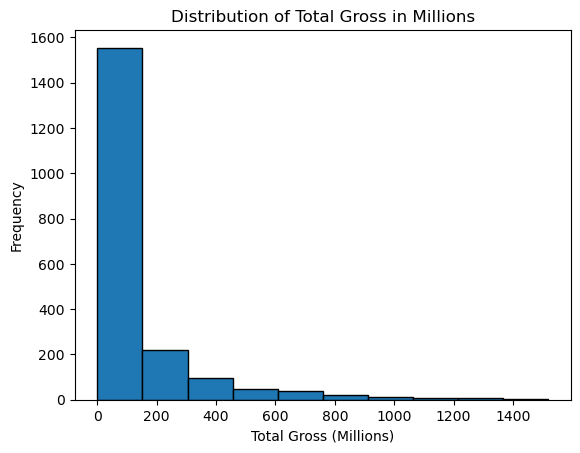

In [49]:
# Creating a histogram for the data
plt.hist(box_office_movie_gross['total_gross (millions)'], bins=10, edgecolor='black')
plt.xlabel('Total Gross (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Gross in Millions')
plt.show()

We have a skewed distribution and majority of movies make less than `200 million` in total gross revenue. Some movies make above `1 billion dolars` although these are very few and are outliers in our data. To better visualise this we could use a boxplot.

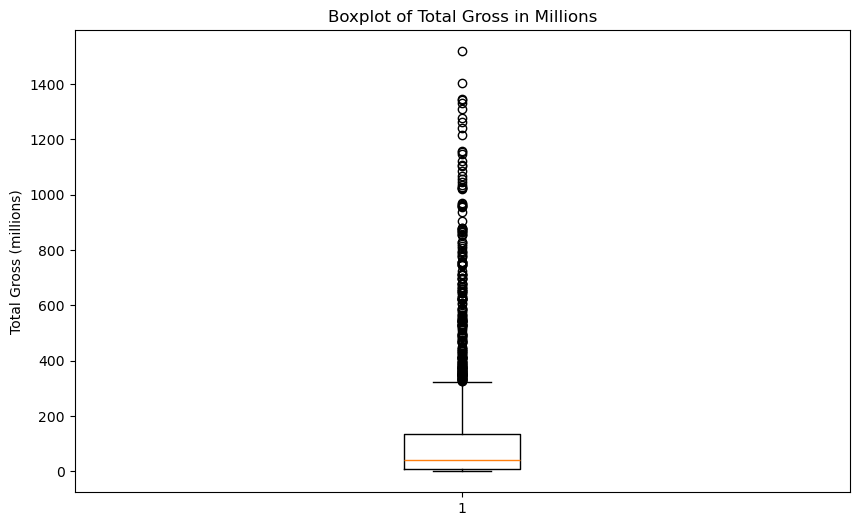

In [51]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(box_office_movie_gross['total_gross (millions)'])
plt.title('Boxplot of Total Gross in Millions')
plt.ylabel('Total Gross (millions)')
plt.show()

In the boxplot, we can further solidify our findings that majority of movies total gross is under `400 million` majority of the bringing in around `25 million` to `100 million`. It would be correct to reccomend that `in order to maximize revenue potential, the studio should invest heavily in marketing and distribution to boost the movies visibility and appeal`. This potentially may lead to higher grossing outliers in the studio.

In [40]:
# The mean total_gross (millions) in the numbers_movie_budgets
numbers_movie_budgets['total_gross (millions)'].mean()

133.3607877734348

In [52]:
# The mode total_gross (millions) in the numbers_movie_budgets
numbers_movie_budgets['total_gross (millions)'].mode()

0    0.0
Name: total_gross (millions), dtype: float64

In [53]:
# The median total_gross (millions) in the numbers_movie_budgets
numbers_movie_budgets['total_gross (millions)'].median()

46.058546

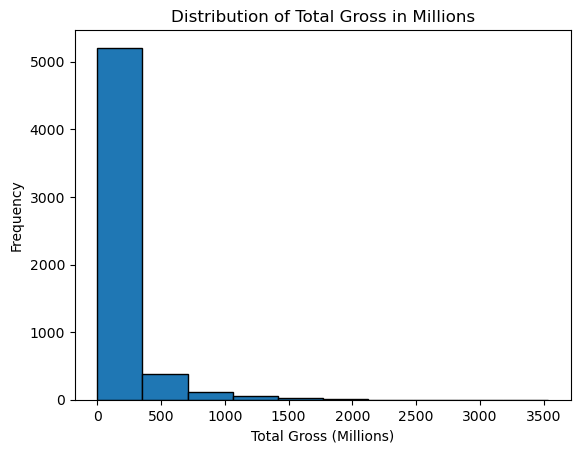

In [54]:
# Creating a histogram for the data
plt.hist(numbers_movie_budgets['total_gross (millions)'], bins=10, edgecolor='black')
plt.xlabel('Total Gross (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Gross in Millions')
plt.show()

We can again see that the distribution is skewed and a majority of the movies make less than `400 million`. 

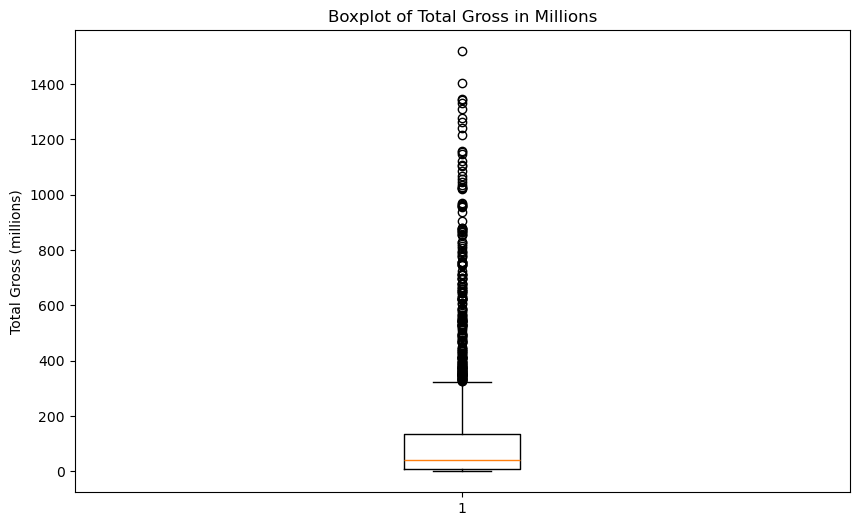

In [55]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(box_office_movie_gross['total_gross (millions)'])
plt.title('Boxplot of Total Gross in Millions')
plt.ylabel('Total Gross (millions)')
plt.show()

This further confirms our findings and shows what the average movie makes. Now we will categorise any movie above `50 million` a successful movie.

In [41]:
# The mean production_budget (millions) in the numbers_movie_budget
numbers_movie_budgets['production_budget (millions)'].mean()

31.587757096506397

In [56]:
# The mode production_budget (millions) in the numbers_movie_budget
numbers_movie_budgets['production_budget (millions)'].mode()

0    20.0
Name: production_budget (millions), dtype: float64

In [57]:
# The mean production_budget (millions) in the numbers_movie_budget
numbers_movie_budgets['production_budget (millions)'].median()

17.0

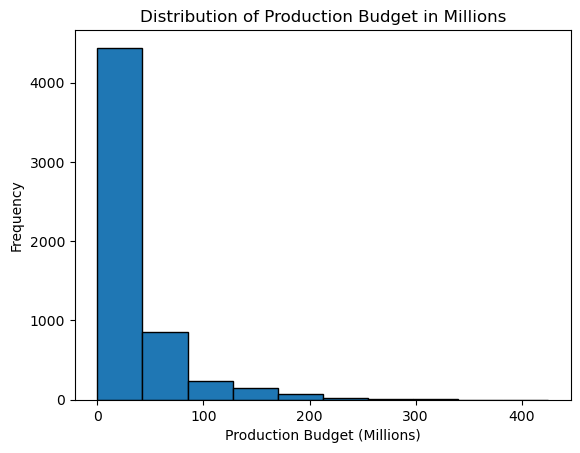

In [59]:
# Creating a histogram for the data
plt.hist(numbers_movie_budgets['production_budget (millions)'], bins=10, edgecolor='black')
plt.xlabel('Production Budget (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Production Budget in Millions')
plt.show()

Here we can again see a skewed distribution that shows that the budget of majority of movies is under `50 million`. Let's create a `boxplot` to better understand this.

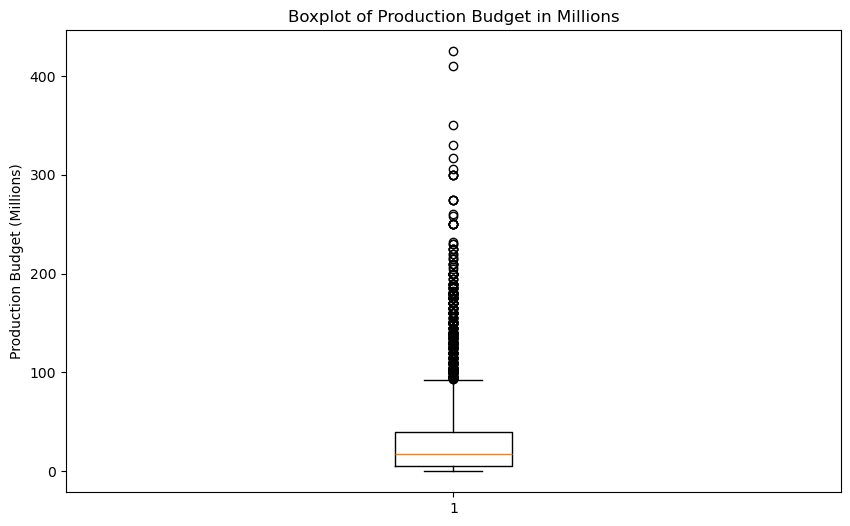

In [61]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(numbers_movie_budgets['production_budget (millions)'])
plt.title('Boxplot of Production Budget in Millions')
plt.ylabel('Production Budget (Millions)')
plt.show()

We can now see that majority of movies have their budget between `5 million` and `50 million`. The median movie budget is `17 million`. Let's try and see if there is a correlation between the top performing movies financially and the production budgets.

In [64]:
# Creating a new DataFrame with total gross > 50 million 
# Starting with the numbers_movie_budget
successful_movies_gross = numbers_movie_budgets.loc[numbers_movie_budgets['total_gross (millions)'] > 50]

successful_movies_gross.head(10)

,id,release_date,movie,production_budget (millions),worldwide_gross (millions),domestic_gross (millions),total_gross (millions)
0,1,"Dec 18, 2009",Avatar,425.0,2776.345279,760.507625,3536.852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,1045.663875,241.063875,1286.727750
2,3,"Jun 7, 2019",Dark Phoenix,350.0,149.762350,42.762350,192.524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,1403.013963,459.005868,1862.019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,1316.721747,620.181382,1936.903129
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306.0,2053.311220,936.662225,2989.973445
6,7,"Apr 27, 2018",Avengers: Infinity War,300.0,2048.134200,678.815482,2726.949682
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300.0,963.420425,309.420425,1272.840850
8,9,"Nov 17, 2017",Justice League,300.0,655.945209,229.024295,884.969504
9,10,"Nov 6, 2015",Spectre,300.0,879.620923,200.074175,1079.695098


Let's now try determine the median amount of money that is spent on production budget of successful movies.

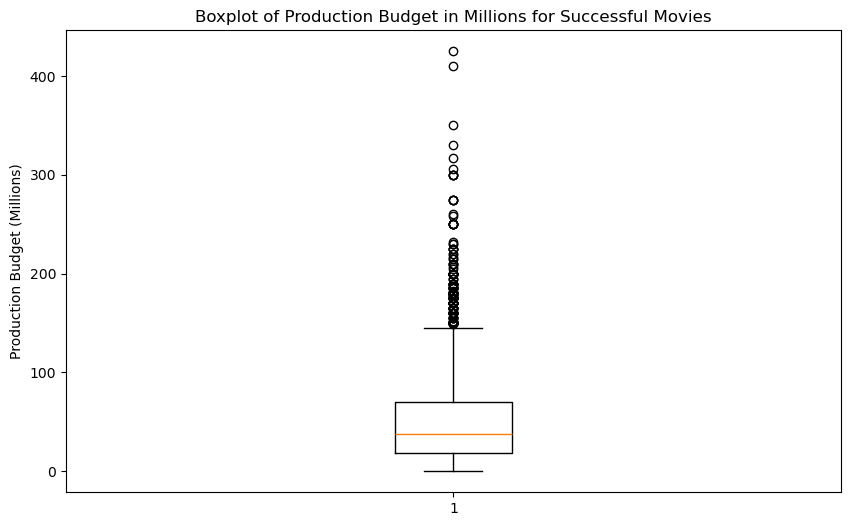

In [70]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(successful_movies_gross['production_budget (millions)'])
plt.title('Boxplot of Production Budget in Millions for Successful Movies')
plt.ylabel('Production Budget (Millions)')
plt.show()

In [67]:
successful_movies_gross['production_budget (millions)'].median()

37.5

Here we can see that for a top performing movie, the median production cost is `37.5 million` dollars. This goes to show that top performing movies have a profit margin of about `12.5 million` dollars and above. We can therefore recommend that the production the production budget should be kept between a minimum of `20 million` to `37.5 million` dollars in order to mitigate risk and increase profits.